<a href="https://colab.research.google.com/github/LYZAcell/data_study/blob/main/BDA(%ED%8C%90%EB%8B%A4%EC%8A%A4)/%EA%B3%BC%EC%A0%9C/%ED%95%84%EC%88%98_%EC%9D%B4%EA%B0%80%EC%98%8141_0126.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필수과제1.
- crime csv 파일을 가지고 ARMA ,ARIMA 예측 지행
- 실제 train,test 데이터 시계열로 나눠서 15일을 예측해 보자!
- 얼마나 성능이 좋은지 둘을 비교하여서 시계열 성능과 시각화 그래프로 나타내보자

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

data = pd.read_csv('crime.csv')
data.head()

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0


In [ ]:
# 날짜 형식으로 변환
data['REPORTED_DATE'] = pd.to_datetime(data['REPORTED_DATE'])

# 범죄 발생 수 집계 (일별)
daily_crime = data.groupby(data['REPORTED_DATE'].dt.date).size()

# 데이터프레임으로 변환
daily_crime = daily_crime.reset_index(name='crime_count')

# 날짜를 인덱스로 설정
daily_crime['REPORTED_DATE'] = pd.to_datetime(daily_crime['REPORTED_DATE'])
daily_crime.set_index('REPORTED_DATE', inplace=True)

# 데이터 확인
print(daily_crime.head())

               crime_count
REPORTED_DATE             
2012-01-02              62
2012-01-03             107
2012-01-04             149
2012-01-05             144
2012-01-06             143


In [ ]:
# 데이터 분할
train_data = daily_crime[:-15]
test_data = daily_crime[-15:]

In [ ]:
# ARMA 모델 적합 (p, q 값 설정 필요)
p, q = 2, 2  # 적절한 p, q 값 선택
arma_model = ARIMA(train_data, order=(p, 0, q))
arma_fit = arma_model.fit()

# 예측
arma_forecast = arma_fit.forecast(steps=15)

# ARIMA 모델 적합 (p, d, q 값 설정 필요)
d = 1  # 차분 차수
arima_model = ARIMA(train_data, order=(p, d, q))
arima_fit = arima_model.fit()

# 예측
arima_forecast = arima_fit.forecast(steps=15)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

In [ ]:
# 성능 평가
arma_mse = mean_squared_error(test_data, arma_forecast)
arima_mse = mean_squared_error(test_data, arima_forecast)

print(f'ARMA(아르마) MSE: {arma_mse}')
print(f'ARIMA(아리마) MSE: {arima_mse}')

ARMA MSE: 5048.26970564299
ARIMA MSE: 4966.25859487309


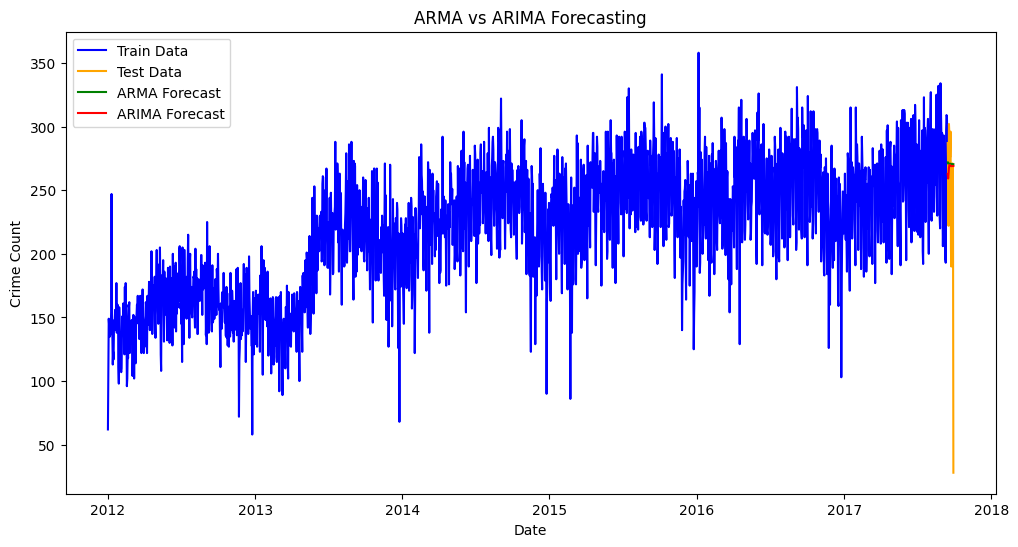

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Train Data', color='blue')
plt.plot(test_data, label='Test Data', color='orange')
plt.plot(test_data.index, arma_forecast, label='ARMA Forecast', color='green')
plt.plot(test_data.index, arima_forecast, label='ARIMA Forecast', color='red')
plt.legend()
plt.title('ARMA vs ARIMA Forecasting')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.show()